##### học thuật toán :
- Kmeans
- Gaussian mixture
- Mean shift

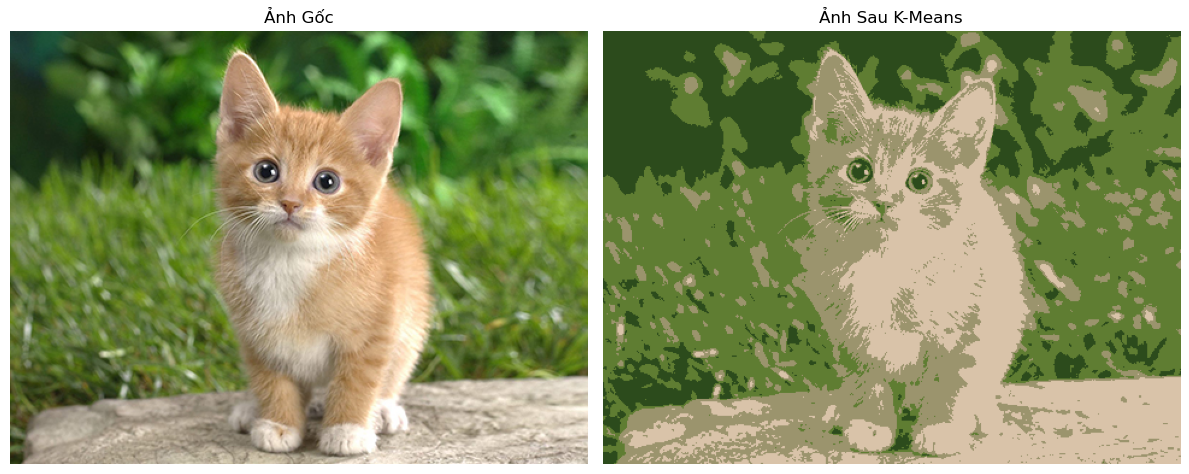

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# ===== 1. Hàm tính khoảng cách Euclidean =====
def euclidean_distance(p1, p2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(p1, p2)))

# ===== 2. Khởi tạo ngẫu nhiên K tâm cụm =====
def initialize_centroids(data, k):
    return random.sample(data, k)

# ===== 3. Gán mỗi điểm vào cụm gần nhất =====
def assign_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    labels = []
    for point in data:
        distances = [euclidean_distance(point, c) for c in centroids]
        min_idx = distances.index(min(distances))
        clusters[min_idx].append(point)
        labels.append(min_idx)
    return clusters, labels

# ===== 4. Tính lại tâm cụm mới =====
def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if cluster:
            mean = [sum(dim) / len(cluster) for dim in zip(*cluster)]
        else:
            mean = [0, 0, 0]
        new_centroids.append(mean)
    return new_centroids

# ===== 5. Thuật toán K-Means chính =====
def kmeans(data, k, max_iter=10):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iter):
        clusters, labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters)
        if new_centroids == centroids:
            break
        centroids = new_centroids
    return centroids, labels

# ===== 6. Đọc ảnh và xử lý =====
def process_image(image_path, k=8):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # reshape ảnh về (số pixel, 3)
    pixel_data = img_rgb.reshape((-1, 3))
    pixel_list = pixel_data.tolist()

    # áp dụng k-means
    centroids, labels = kmeans(pixel_list, k)
    compressed_pixels = [centroids[label] for label in labels]

    # tạo lại ảnh từ kết quả
    compressed_array = np.array(compressed_pixels, dtype=np.uint8).reshape(img_rgb.shape)

    return img_rgb, compressed_array

# ===== 7. Giao diện hiển thị =====
def show_images(original, compressed):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original)
    axes[0].set_title("Ảnh Gốc")
    axes[0].axis("off")
    axes[1].imshow(compressed)
    axes[1].set_title("Ảnh Sau K-Means")
    axes[1].axis("off")
    plt.tight_layout()
    plt.show()

# ===== 8. Chạy chương trình =====
if __name__ == "__main__":
    # 👉 Thay đường dẫn ảnh của bạn tại đây:
    image_path = r"D:\SUM25\CPV\code_in_class\images\cat.jpg"  # ví dụ: "cat.jpg"

    # K là số màu (cụm)
    original, compressed = process_image(image_path, k=4)


    # Hiển thị kết quả
    show_images(original, compressed)


### số cụm càng lớn ảnh càng gần với ảnh gốc

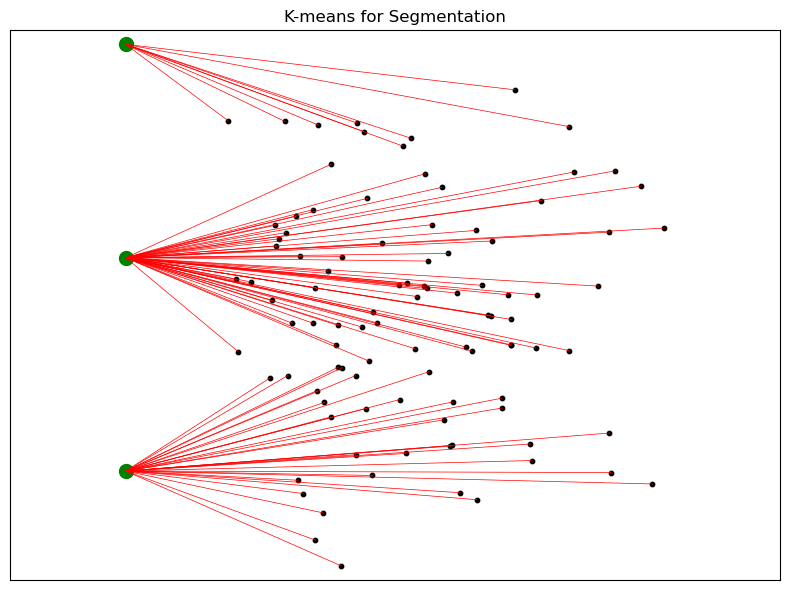

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Tạo dữ liệu ngẫu nhiên mô phỏng các điểm
np.random.seed(0)
points = np.random.randn(100, 2) * 0.75 + np.array([2, 2])

# Khởi tạo số cụm
k = 3
initial_centroids = np.array([[0, 1], [0, 2.5], [0, 4]])

# Gán điểm cho cụm gần nhất
def assign_clusters(points, centroids):
    clusters = {}
    for i in range(len(centroids)):
        clusters[i] = []

    for point in points:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        cluster_id = np.argmin(distances)
        clusters[cluster_id].append(point)

    return clusters

# Vẽ hình minh họa
def plot_kmeans_segmentation(points, centroids, clusters):
    plt.figure(figsize=(8, 6))
    plt.title("K-means for Segmentation")
    
    # Vẽ tất cả các điểm
    plt.scatter(points[:, 0], points[:, 1], s=10, color='black')

    # Vẽ các tâm cụm
    for centroid in centroids:
        plt.scatter(*centroid, color='green', s=100)

    # Vẽ đường nối từ điểm đến tâm cụm tương ứng
    for cluster_id, cluster_points in clusters.items():
        for point in cluster_points:
            plt.plot([point[0], centroids[cluster_id][0]],
                     [point[1], centroids[cluster_id][1]],
                     color='red', linewidth=0.5)

    plt.axis('equal')
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()

# Gán cụm
clusters = assign_clusters(points, initial_centroids)

# Vẽ hình
plot_kmeans_segmentation(points, initial_centroids, clusters)


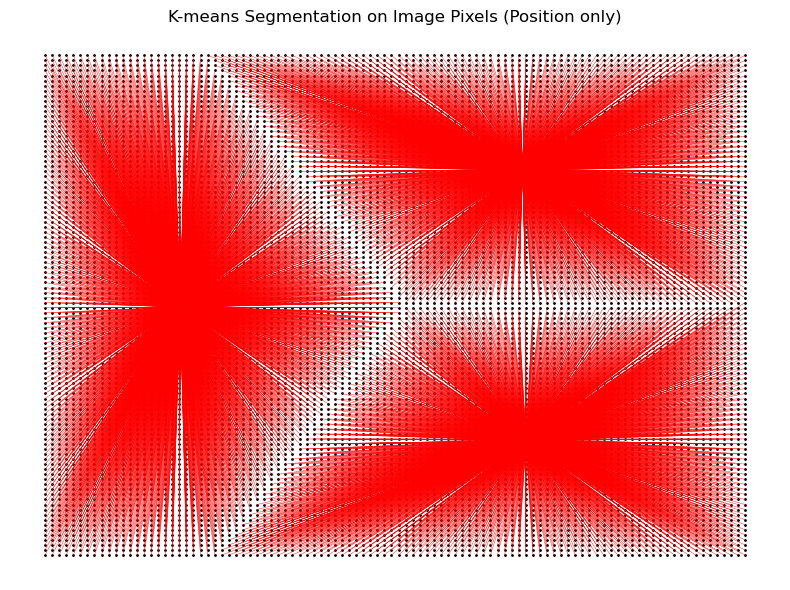

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# === K-means functions ===
def euclidean_distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

def initialize_centroids(data, k):
    return random.sample(data, k)

def assign_clusters(data, centroids):
    clusters = {i: [] for i in range(len(centroids))}
    labels = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_id = np.argmin(distances)
        clusters[cluster_id].append(point)
        labels.append(cluster_id)
    return clusters, labels

def update_centroids(clusters):
    new_centroids = []
    for points in clusters.values():
        if points:
            new_centroids.append(np.mean(points, axis=0))
        else:
            new_centroids.append(np.zeros(2))
    return new_centroids

def kmeans(data, k, max_iter=10):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iter):
        clusters, labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

# === Load and prepare image as 2D positions ===
img_path = r"D:\SUM25\CPV\code_in_class\images\cat.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize for simplicity
small_img = cv2.resize(img_rgb, (100, 100))
h, w, _ = small_img.shape

# Create (x, y) coordinate points
points = [(x, y) for y in range(h) for x in range(w)]

# Run K-means on spatial (x, y)
k = 3
centroids, clusters = kmeans(points, k)

# === Visualization ===
def plot_segmentation(points, centroids, clusters):
    plt.figure(figsize=(8, 6))
    plt.title("K-means Segmentation on Image Pixels (Position only)")
    
    # Vẽ pixel như chấm đen
    px = np.array(points)
    plt.scatter(px[:, 0], px[:, 1], s=1, color='black')

    # Vẽ tâm cụm
    for c in centroids:
        plt.scatter(*c, color='green', s=100)

    # Vẽ đường từ điểm đến tâm cụm
    for cid, pts in clusters.items():
        for pt in pts:
            plt.plot([pt[0], centroids[cid][0]],
                     [pt[1], centroids[cid][1]],
                     color='red', linewidth=0.3)

    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_segmentation(points, centroids, clusters)
